In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("../data/driving_style_dataset_srilanka.csv")

In [94]:
df.head()

,trip_id,driver_id,vehicle_make,vehicle_model,origin,destination,distance_km,elevation_gain_m,trip_date,avg_speed,max_speed,acceleration_mean,acceleration_std,braking_intensity,trip_duration_min,road_type,weather,time_of_day,driving_style
0,TR000001,DRV0353,MG,ZS EV,Kandy,Jaffna,267,221,2024-12-21 11:33:28,41.79,55.88,0.447,0.300,0.136,359,city,light_rain,evening,Eco
1,TR000002,DRV0339,Tesla,Model 3,Trincomalee,Batticaloa,40,57,2024-12-03 11:33:28,51.33,59.92,0.608,0.271,0.128,50,rural,sunny,morning,Normal
2,TR000003,DRV0323,Nissan,Leaf,Batticaloa,Ratnapura,77,69,2025-03-27 11:33:28,52.86,72.89,0.613,0.919,1.060,86,city,monsoon,night,Aggressive
3,TR000004,DRV0113,Tesla,Model 3,Kandy,Colombo,57,111,2025-05-14 11:33:28,15.67,38.98,2.377,0.926,0.730,199,rural,cloudy,morning,Aggressive
4,TR000005,DRV0108,MG,ZS EV,Matara,Trincomalee,155,98,2025-03-23 11:33:28,33.41,40.48,0.443,0.308,0.086,261,coastal,cloudy,morning,Eco


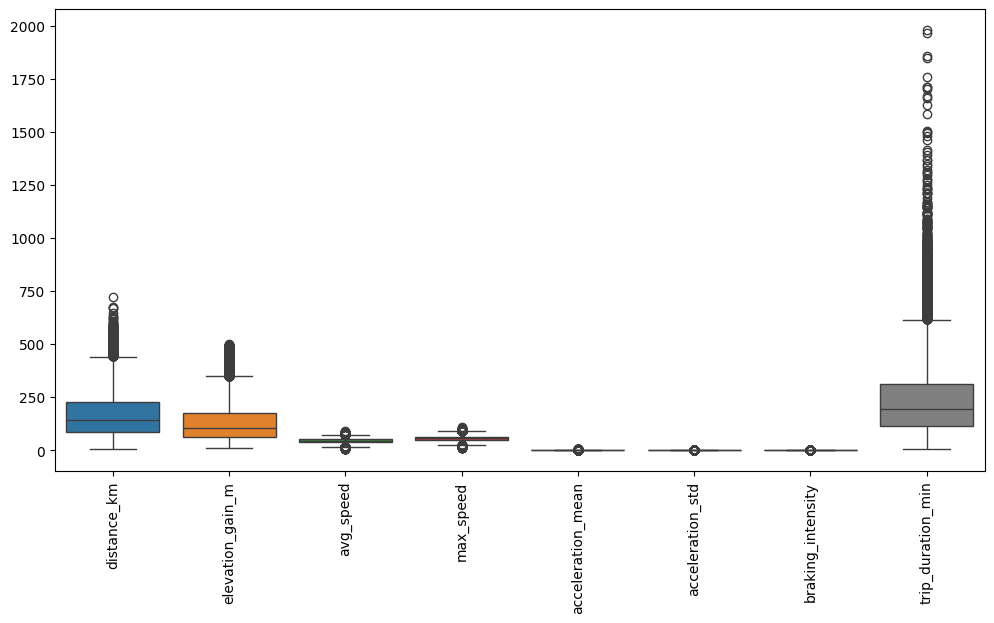

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


**Reasoning**:
Print the data types of the columns to identify numerical columns and then create a list of numerical columns likely containing outliers based on the previous box plot.



In [96]:
print(df.dtypes)
numerical_cols_with_outliers = [
    'distance_km',
    'elevation_gain_m',
    'avg_speed',
    'max_speed',
    'acceleration_mean',
    'acceleration_std',
    'braking_intensity',
    'trip_duration_min'
]

print("\nNumerical columns identified with potential outliers:")
print(numerical_cols_with_outliers)

trip_id               object
driver_id             object
vehicle_make          object
vehicle_model         object
origin                object
destination           object
distance_km            int64
elevation_gain_m       int64
trip_date             object
avg_speed            float64
max_speed            float64
acceleration_mean    float64
acceleration_std     float64
braking_intensity    float64
trip_duration_min      int64
road_type             object
weather               object
time_of_day           object
driving_style         object
dtype: object

Numerical columns identified with potential outliers:
['distance_km', 'elevation_gain_m', 'avg_speed', 'max_speed', 'acceleration_mean', 'acceleration_std', 'braking_intensity', 'trip_duration_min']


In [97]:
numerical_cols_with_outliers = [
    'distance_km',
    'elevation_gain_m',
    'avg_speed',
    'max_speed',
    'acceleration_mean',
    'acceleration_std',
    'braking_intensity',
    'trip_duration_min'
]
for col in numerical_cols_with_outliers:
    upper_bound = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [98]:
numerical_cols_with_outliers = [
    'distance_km',
    'elevation_gain_m',
    'avg_speed',
    'max_speed',
    'acceleration_mean',
    'acceleration_std',
    'braking_intensity',
    'trip_duration_min'
]

for col in numerical_cols_with_outliers:
    upper_bound = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

display(df.head())

,trip_id,driver_id,vehicle_make,vehicle_model,origin,destination,distance_km,elevation_gain_m,trip_date,avg_speed,max_speed,acceleration_mean,acceleration_std,braking_intensity,trip_duration_min,road_type,weather,time_of_day,driving_style
0,TR000001,DRV0353,MG,ZS EV,Kandy,Jaffna,267.0,221.0,2024-12-21 11:33:28,41.79,55.88,0.447,0.300,0.136,359.0,city,light_rain,evening,Eco
1,TR000002,DRV0339,Tesla,Model 3,Trincomalee,Batticaloa,40.0,57.0,2024-12-03 11:33:28,51.33,59.92,0.608,0.271,0.128,50.0,rural,sunny,morning,Normal
2,TR000003,DRV0323,Nissan,Leaf,Batticaloa,Ratnapura,77.0,69.0,2025-03-27 11:33:28,52.86,72.89,0.613,0.919,1.060,86.0,city,monsoon,night,Aggressive
3,TR000004,DRV0113,Tesla,Model 3,Kandy,Colombo,57.0,111.0,2025-05-14 11:33:28,15.67,38.98,2.377,0.926,0.730,199.0,rural,cloudy,morning,Aggressive
4,TR000005,DRV0108,MG,ZS EV,Matara,Trincomalee,155.0,98.0,2025-03-23 11:33:28,33.41,40.48,0.443,0.308,0.086,261.0,coastal,cloudy,morning,Eco


**Reasoning**:
Create a box plot of the entire DataFrame to visualize the distribution of numerical columns after outlier handling.



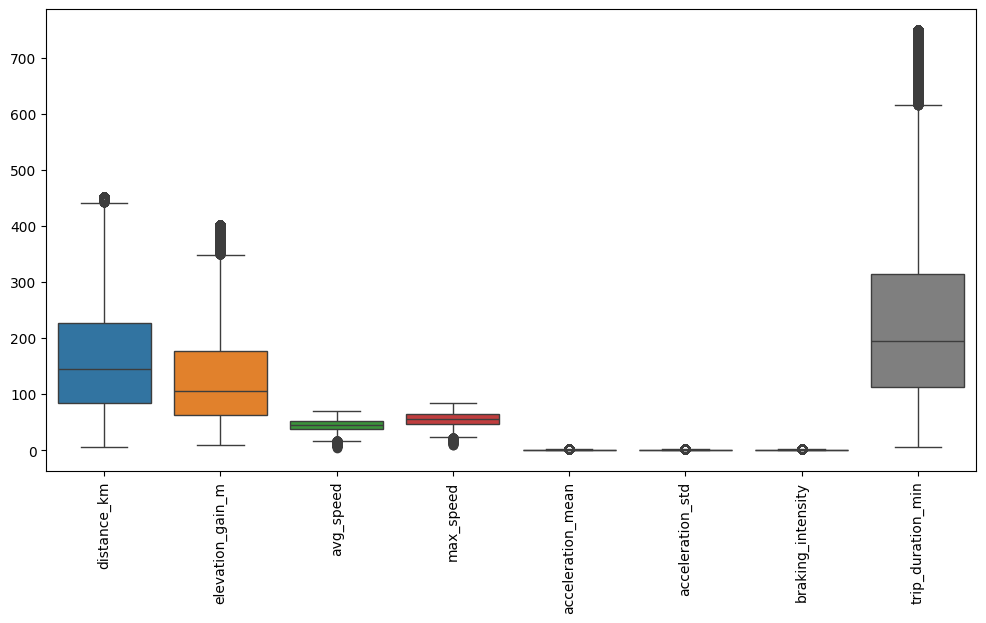

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [100]:
new_df = df[[
    'vehicle_make',
    'vehicle_model',
    'distance_km',
    'elevation_gain_m',
    'avg_speed',
    'max_speed',
    'acceleration_mean',
    'acceleration_std',
    'braking_intensity',
    'trip_duration_min',
    'road_type',
    'weather',
    'time_of_day',
    'driving_style'
]]

In [101]:
new_df['vehicle_model'].value_counts()

vehicle_model
ZS EV      12533
Model 3    12519
Atto 3     12486
Leaf       12462
Name: count, dtype: int64

In [102]:
new_df['vehicle_make'].value_counts()

vehicle_make
MG        12533
Tesla     12519
BYD       12486
Nissan    12462
Name: count, dtype: int64

In [103]:
new_df['road_type'].value_counts()

road_type
city       12553
rural      12545
coastal    12508
highway    12394
Name: count, dtype: int64

In [104]:
new_df['weather'].value_counts()

weather
sunny         17579
cloudy        12499
heavy_rain     7512
light_rain     7456
monsoon        4954
Name: count, dtype: int64

In [105]:
new_df['time_of_day'].value_counts()

time_of_day
morning      12674
afternoon    12504
evening      12453
night        12369
Name: count, dtype: int64

In [106]:
new_df['driving_style'].value_counts()

driving_style
Normal        29224
Aggressive    11205
Eco            9571
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

X = new_df.drop('driving_style', axis=1)
y = new_df['driving_style']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("Value counts of the target variable after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Value counts of the target variable after SMOTE:
1    29224
2    29224
0    29224
Name: count, dtype: int64


In [108]:
x = new_df.drop('driving_style',axis=1)
y = new_df['driving_style']

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled successfully using MinMaxScaler!")

Data split and scaled successfully using MinMaxScaler!


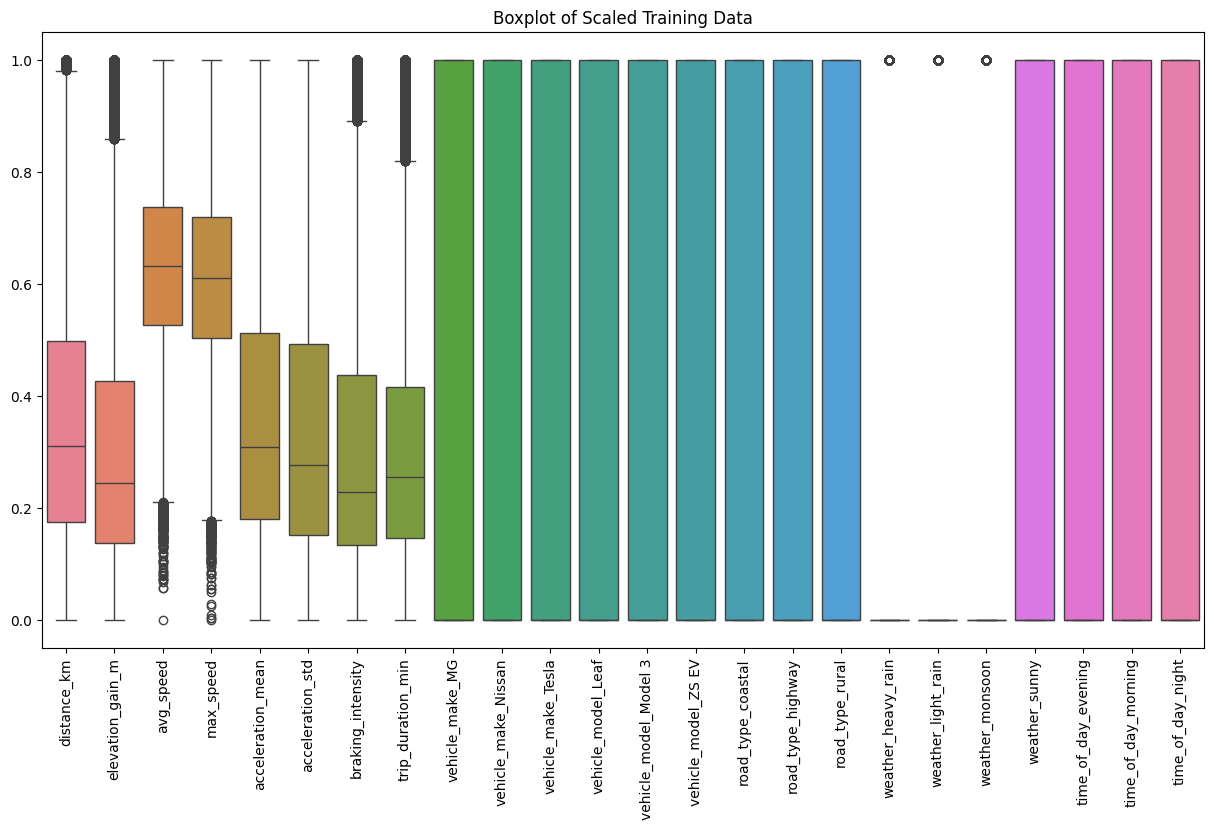

In [110]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_scaled_df)
plt.title('Boxplot of Scaled Training Data')
plt.xticks(rotation=90)
plt.show()

In [111]:
X_train_scaled_df.head()

,distance_km,elevation_gain_m,avg_speed,max_speed,acceleration_mean,acceleration_std,braking_intensity,trip_duration_min,vehicle_make_MG,vehicle_make_Nissan,vehicle_make_Tesla,vehicle_model_Leaf,vehicle_model_Model 3,vehicle_model_ZS EV,road_type_coastal,road_type_highway,road_type_rural,weather_heavy_rain,weather_light_rain,weather_monsoon,weather_sunny,time_of_day_evening,time_of_day_morning,time_of_day_night
0,0.255034,0.247449,0.601328,0.607487,0.320799,0.602103,0.154615,0.209677,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.664430,0.158163,0.658216,0.737922,0.171171,0.185390,0.296884,0.513441,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.624161,1.000000,0.675268,0.621563,0.406189,0.276702,0.403292,0.486559,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.147604,0.015279,0.797171,0.714023,0.132841,0.209645,0.172280,0.095388,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.773124,1.000000,0.499217,0.413266,0.433802,0.624212,0.317066,0.670791,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [112]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (70137, 24)
Shape of X_test_scaled: (17535, 24)
Shape of y_train: (70137,)
Shape of y_test: (17535,)


In [113]:
y_train_df = pd.DataFrame(y_train, columns=['driving_style_encoded'])
y_test_df = pd.DataFrame(y_test, columns=['driving_style_encoded'])

print("y_train converted to DataFrame:")
display(y_train_df.head())
print("\ny_test converted to DataFrame:")
display(y_test_df.head())

y_train converted to DataFrame:


,driving_style_encoded
0,0
1,2
2,2
3,1
4,0



y_test converted to DataFrame:


,driving_style_encoded
0,2
1,0
2,2
3,1
4,1


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [115]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(n_neighbors=5)
]

In [116]:
def modelSelection(test_model):
    model = test_model
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print("Model Name", test_model)
    print("Accuracy Score:", accuracy_score(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))

In [117]:
for model in models:
  modelSelection(model)

Model Name LogisticRegression()
Accuracy Score: 0.9134302822925577
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      5864
           1       0.93      0.96      0.94      5755
           2       0.87      0.87      0.87      5916

    accuracy                           0.91     17535
   macro avg       0.91      0.91      0.91     17535
weighted avg       0.91      0.91      0.91     17535

Model Name DecisionTreeClassifier()
Accuracy Score: 0.9864841745081266
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5864
           1       1.00      1.00      1.00      5755
           2       0.98      0.98      0.98      5916

    accuracy                           0.99     17535
   macro avg       0.99      0.99      0.99     17535
weighted avg       0.99      0.99      0.99     17535

Model Name RandomForestClassifier()
Accuracy Score: 

In [118]:
model = RandomForestClassifier()

In [119]:
model.fit(X_train_scaled,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
pred = model.predict(X_test_scaled)

In [121]:
print("Accuracy Score:", accuracy_score(y_test, pred))

Accuracy Score: 0.9966923296264614


In [122]:
random_input_scaled = pd.DataFrame(np.random.rand(1, X_train_scaled.shape[1]), columns=X_train.columns)
predicted_driving_style_encoded = model.predict(random_input_scaled)
predicted_driving_style = label_encoder.inverse_transform(predicted_driving_style_encoded)

print("Random input data (scaled):")
display(random_input_scaled)
print("\nPredicted driving style:")
print(predicted_driving_style[0])

Random input data (scaled):


c:\Users\Chanuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,distance_km,elevation_gain_m,avg_speed,max_speed,acceleration_mean,acceleration_std,braking_intensity,trip_duration_min,vehicle_make_MG,vehicle_make_Nissan,vehicle_make_Tesla,vehicle_model_Leaf,vehicle_model_Model 3,vehicle_model_ZS EV,road_type_coastal,road_type_highway,road_type_rural,weather_heavy_rain,weather_light_rain,weather_monsoon,weather_sunny,time_of_day_evening,time_of_day_morning,time_of_day_night
0,0.996985,0.790554,0.177478,0.219175,0.767353,0.77907,0.750758,0.025823,0.870849,0.793763,0.88965,0.660678,0.70147,0.846229,0.743871,0.390114,0.88819,0.037135,0.820055,0.983814,0.425371,0.563642,0.569347,0.426756



Predicted driving style:
Aggressive


In [123]:
random_index = np.random.randint(0, len(X_train_scaled_df))
test_input_scaled = X_train_scaled_df.iloc[[random_index]]
true_driving_style_encoded = y_train[random_index]
predicted_driving_style_encoded = model.predict(test_input_scaled)
true_driving_style = label_encoder.inverse_transform([true_driving_style_encoded])[0]
predicted_driving_style = label_encoder.inverse_transform(predicted_driving_style_encoded)[0]


print(f"Input data from training set (scaled):\n")
display(test_input_scaled)
print(f"\nTrue driving style: {true_driving_style}")
print(f"Predicted driving style: {predicted_driving_style}")
if true_driving_style == predicted_driving_style:
    print("\nPrediction matches the true driving style!")
else:
    print("\nPrediction does NOT match the true driving style.")

Input data from training set (scaled):



c:\Users\Chanuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,distance_km,elevation_gain_m,avg_speed,max_speed,acceleration_mean,acceleration_std,braking_intensity,trip_duration_min,vehicle_make_MG,vehicle_make_Nissan,vehicle_make_Tesla,vehicle_model_Leaf,vehicle_model_Model 3,vehicle_model_ZS EV,road_type_coastal,road_type_highway,road_type_rural,weather_heavy_rain,weather_light_rain,weather_monsoon,weather_sunny,time_of_day_evening,time_of_day_morning,time_of_day_night
41986,0.177466,0.084899,0.226887,0.206653,0.801362,0.634563,0.595698,0.310232,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0



True driving style: Aggressive
Predicted driving style: Aggressive

Prediction matches the true driving style!


In [124]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
print("RandomForestClassifier trained successfully.")

RandomForestClassifier trained successfully.


In [125]:
import pickle

In [128]:
filename = 'driving_style.pkl'
pickle.dump(model, open(filename, 'wb'))